In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


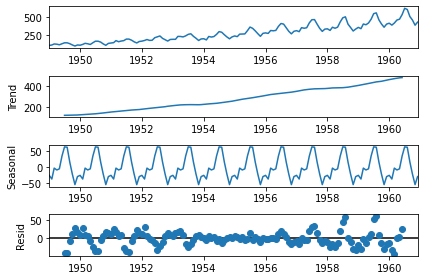

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

In [8]:
def exp_smth(x_t_1, a, s_t_1):
	return a*x_t_1+(1-a)*s_t_1
data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(7)
s[0] = data[0]
for t, x_t in enumerate(data):
	s[t+1] = exp_smth(x_t, a, s[t])
print(s)

[15.      15.      18.5     23.05    27.915   25.8745  26.66235]


In [9]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(data)
alpha = 0.7
model = ses.fit(smoothing_level=alpha,optimized=False)
forecast = model.forecast(1)
print(forecast)

[26.66235]


In [11]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)
result = adfuller(df.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


/var/folders/8_/y936460960110gnpk46t3fw00000gn/T/ipykernel_78877/3755095242.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)


In [12]:
df_diff_1 = df.diff(periods=1).dropna()

test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.625178633871336
p-value:  1.5472400091970336e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен


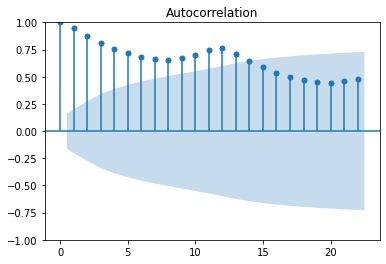

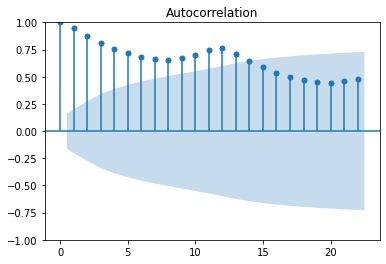

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
plot_acf(df)

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

In [15]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

In [16]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Mon, 16 Jan 2023   AIC                          48483.625
Time:                        13:27:45   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

In [ ]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)